<a href="https://colab.research.google.com/github/FacuHerrera00/Car-Sales/blob/main/CarSales-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Venta de Autos.

¿Qué harías si supieras el valor del auto que quieres para el próximo mes, para el próximo año? Se me ocurren mil opciones, buscaría la opción de tenerlo cuanto antes, lo empezaría a pagar ahora y para el año que viene tenerlo listo, o lo contrario, no desesperarme, o buscaría un auto mejor.

La situación del país, hoy en día, te hace replantearte mil cosas antes de avanzar en negocios como estos y se que ustedes como empresa pueden tener un panorama, pero en grandes cantidades de información nada es certeza.

El rango de registros que estamos trabajando datan de los últimos 5 años de su compañía. La informaciòn brindada cuenta los siguientes datos: ID, precio, impuesto por importación o exportación(Levy), fabricante, modelo, año de fabricación, categoría, cuero_interior, tipo_de_combustible, Volumen de motor, Millaje, cilindros, tipo de caja, tracción, puertas, rueda, color, airbags.

#HIPÓTESIS:

#-Futuro precio de los coches depende de ciertas características.

-Existe una predominancia en ventas de coches sedán.

-¿La seguridad es un factor importante a la hora de la compra de un automóvil?

-En un futuro cuánto será el porcentaje de autos con turbo.


#OBJETIVOS

Desarrollando el desafío, se espera poder comprender qué acciones a futuro aplicar para obtener un mayor número de ventas de autos de acuerdo al público al que se expone la compañía.

#INTRODUCCIÓN

El caso está estructurado de la siguiente manera: 

(1) realizaremos un análisis de datos exploratorio para investigar visualmente las variables puestas en juego; 

(2) utilizar los conocimientos observados para ajustar formalmente los modelos elegidos; y finalmente 

(3) abordar las recomendaciones hacia ustedes.



In [ ]:
#Errores
import warnings
warnings.filterwarnings('ignore')

#Carga de datos
from google.colab import drive

#Visualizaciones y EDA
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

#Encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

##IterativeEncoder
from sklearn import preprocessing

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer 

#Normalización de variables
from sklearn.preprocessing import MinMaxScaler

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#Hypertuning
from sklearn.model_selection import GridSearchCV

#Metricas
from sklearn.metrics import r2_score


# Carga de datos
Subimos la base de datos

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls /content/drive/MyDrive/DataScience/Datasets/Proyecto/

 car_price_prediction.csv                    Data_Storytelling+Herrera.pptx
 Car_sales.csv                              'Presentación sin título.gslides'
'Copia de Data_Storytelling+Herrera.ipynb'   V3.ipynb
 Data_Storytelling+Herrera.gslides           VentaDeAutos_+ELIA+HERRERA
 Data_Storytelling+Herrera.ipynb            'Venta de Autos+Herrera.gdoc'


In [ ]:
%cd /content/drive/MyDrive/DataScience/Datasets/Proyecto/

/content/drive/MyDrive/DataScience/Datasets/Proyecto


In [ ]:
df = pd.read_csv('car_price_prediction.csv')
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [ ]:
df.shape

(19237, 18)

# Diccionario de variables:

ID: Número único de identificación de venta.

Price: Precio de venta de cada auto.

Levy: Gasto de importación/exportación del vehículo.

Manufacturer: Empresa de manufactura.

Model: Modelo del auto.

Prod. Year: Año de salida del auto.

Category: Categoría en la que se encuentra el vehículo, como Sedan, Jeep, Coupé, etc.

Leather interior: Si tiene asientos de cuero o no.

Fuel type: Tipo de combustible que consume el vehículo.

Engine volume: Volumen del motor, pueden ser motores 1.8, 2.0, etc.

Mileage: Kilometraje del vehículo.

Cylinders: Cantidad de cilindros de acuerdo al motor.

Gear box type: Tipo de caja de cambios.

Drive wheels: Tipo de tracción del auto.

Doors: Número de puertas.

Wheel: Lado en el que está el volante.

Color: Color del vehículo.

Airbags: Número de airbags.


# EDA / Data Cleaning
A simple vista, podemos darnos cuenta que tenemos que quitar los espacios vacíos de las columnas para restar errores, la columna ID no la vamos a necesitar, y muchos valores nulos tienen valores de "-".
Primero cambiaremos eso.


In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
##Cambiamos nombres de columnas
df.columns = ['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
len(df[df.Levy=='-'])

5819

In [ ]:
##Reemplazamos '-' por NaN, mas adelante veremos que podemos hacer con estos valores de importación y exportación.
df = df.replace('-', np.nan)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
##Buscamos duplicados
df.ID.duplicated().sum()

313

In [ ]:
##Dropeamos duplicados
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(18924, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod_year         18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather_interior  18924 non-null  object 
 8   Fuel_type         18924 non-null  object 
 9   Engine_volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear_box_type     18924 non-null  object 
 13  Drive_wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [ ]:
##Quitamos columna 'ID'
df.drop(columns='ID',inplace=True)
df.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Los siguientes cambios a simple vista son:
 
  En 'Mileage' no vamos a usar "km", sino que cambiaremos todos los datos a int.

  En 'Doors' la información está subida como fecha, pero la data correcta sería [2,4,5] para el número de puertas para cada auto. Siendo '2', 2-3 puertas, 4: 4-5 puertas y 5: más de 5 puertas.


In [ ]:
df.isnull().sum(axis=0)

Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod_year              0
Category               0
Leather_interior       0
Fuel_type              0
Engine_volume          0
Mileage                0
Cylinders              0
Gear_box_type          0
Drive_wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [ ]:
##Vamos a reemplazar el 'km' a un valor vacio en la linea de Mileage y a tipo int64
df.Mileage = df.Mileage.str.replace(r'([a-z])','').astype(int)

In [ ]:
##Ahora vamos a cambiar los valores de Doors, de '04-may' a 4, '02-Mar' a 2 y los de más de cinco puertas (>5) a 5.
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)
df['Doors'].astype(int)

0        4
1        4
2        4
3        4
4        4
        ..
19232    2
19233    4
19234    4
19235    4
19236    4
Name: Doors, Length: 18924, dtype: int64

In [ ]:
##Revisamos los valores unicos

for i in df:
    print(i,df[i].unique(),sep=':\n',end='\n\n')

Price:
[13328 16621  8467 ... 56814 63886 22075]

Levy:
['1399' '1018' nan '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'

Lo que podríamos hacer a continuación es separar en una columna aparte, aquellos motores que tengan turbo, y los que no. De esta manera mantendremos los valores de 'Engine_volume' como float y una columna booleana aparte llamada 'Turbo'.

In [ ]:
##Si la longitud de x es mayor a 3, entonces la columna Turbo tendrá un 'Yes', de lo contrario 'No'
df['Turbo'] = df['Engine_volume'].str.contains('Turbo')
##Reemplazamos los valores de letras a espacios vacíos y el tipo de dato a float
df['Engine_volume'] = df['Engine_volume'].str.replace(r'([a-z,' ',A-Z])','').astype(float)

In [ ]:
df['Turbo'].value_counts()

False    17032
True      1892
Name: Turbo, dtype: int64


Se muestra una gran diferencia entre los autos comprados con y sin Turbo.

En el siguiente paso, buscaremos outliers.

In [ ]:
df.head(10)

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4,False
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,4,Left wheel,White,12,False
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,4,Left wheel,Black,12,False
9,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,4,Left wheel,Silver,12,False


In [ ]:
##Vamos a continuar con unas visualizaciones pero para no tener errores vamos a cambiar a todos los NaN valores a '0' por el momento.
df.isnull().sum(axis=0)

Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod_year              0
Category               0
Leather_interior       0
Fuel_type              0
Engine_volume          0
Mileage                0
Cylinders              0
Gear_box_type          0
Drive_wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Turbo                  0
dtype: int64

In [ ]:
df.Levy = df.Levy.replace(np.nan,0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod_year         18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather_interior  18924 non-null  object 
 7   Fuel_type         18924 non-null  object 
 8   Engine_volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear_box_type     18924 non-null  object 
 12  Drive_wheels      18924 non-null  object 
 13  Doors             18924 non-null  int64  
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

PRIMERAS VISUALIZACIONES

In [ ]:
%matplotlib inline

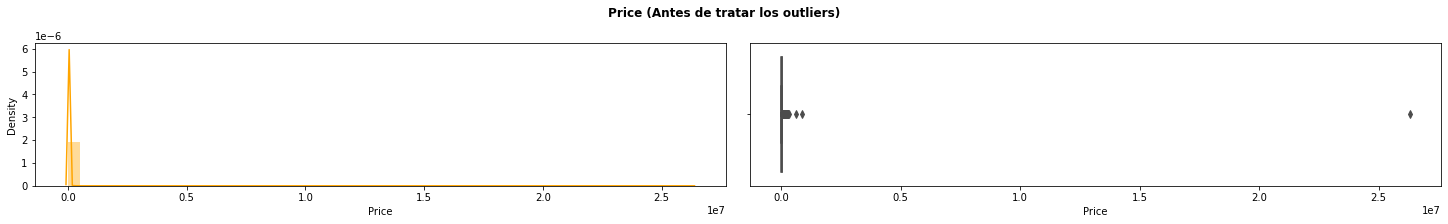

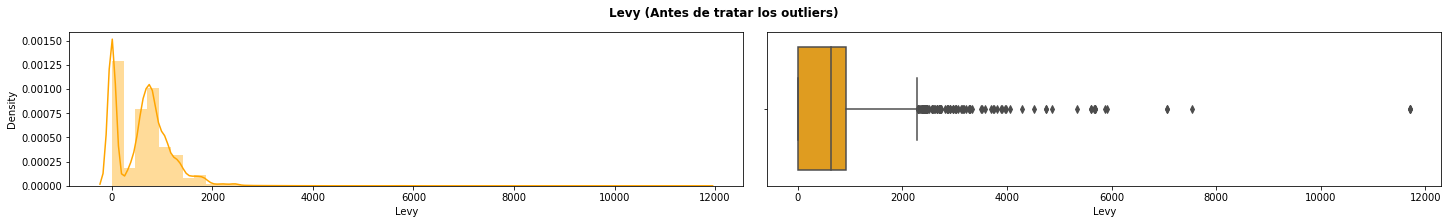

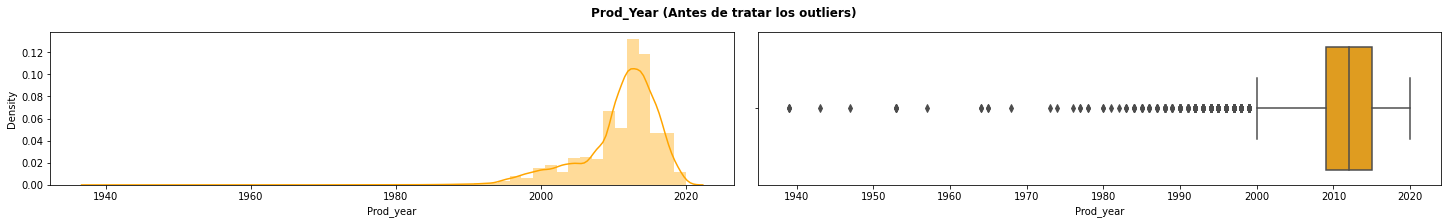

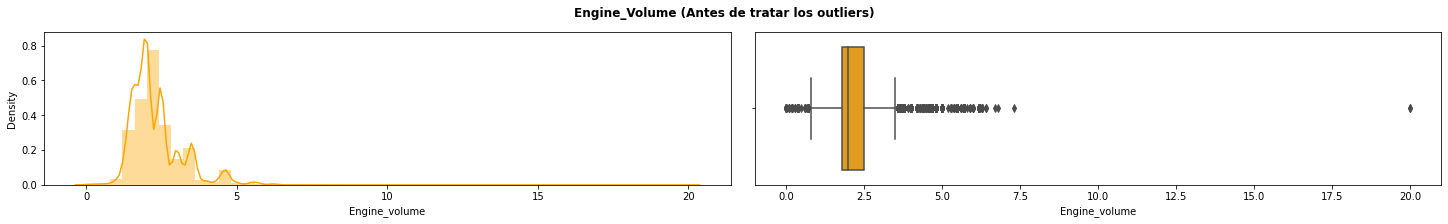

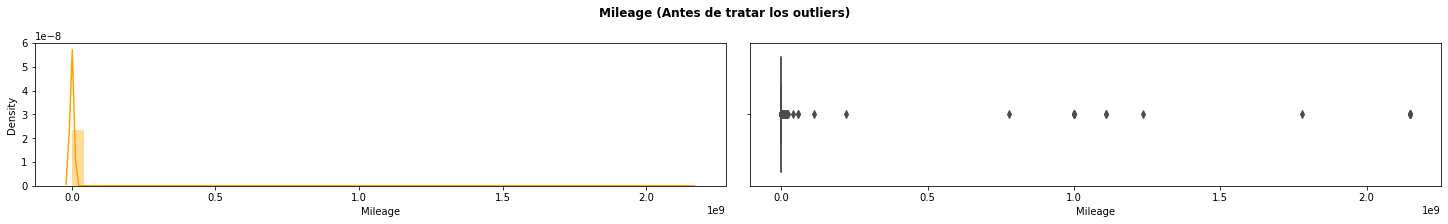

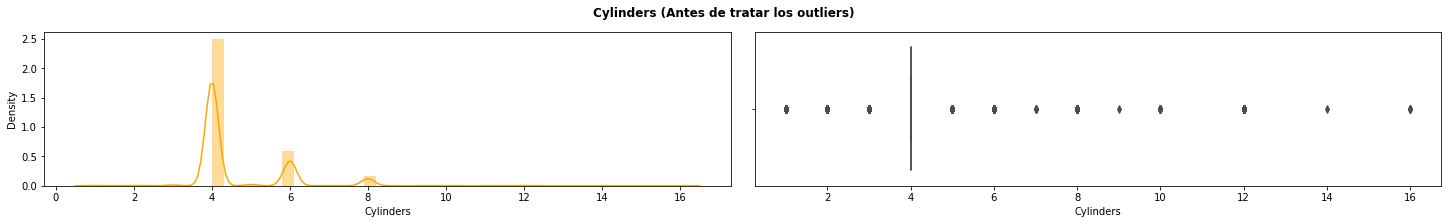

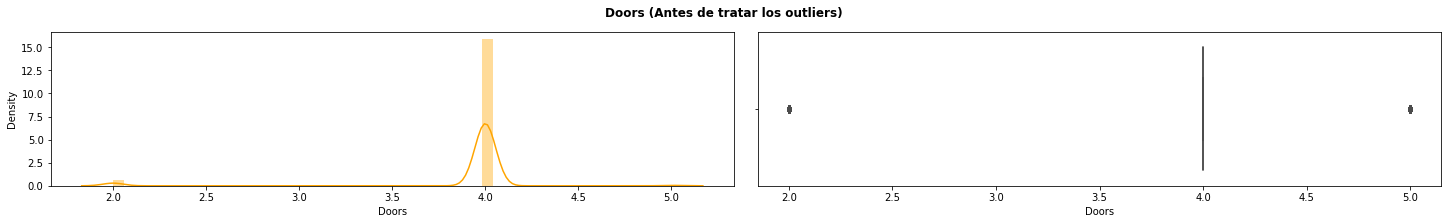

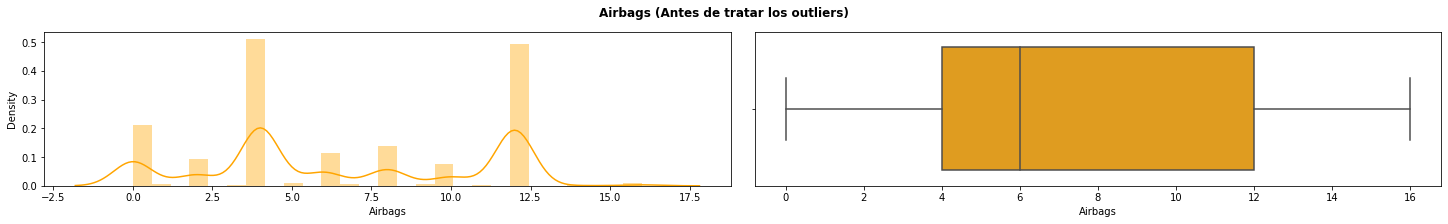

In [ ]:
##Graficamos un distplot y un boxplot de algunas variables numéricas.
var_num = df.select_dtypes(np.number).columns
for i in var_num:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(df[i], ax=ax[0],color='orange')
    sns.boxplot(df[i], ax=ax[1],color='orange')
    plt.suptitle(f'{i.title()} (Antes de tratar los outliers)',weight='bold')
    fig.show()

En el precio y el kilometraje no está muy claro cuales son los outliers. 
Busquémoslos mejor.


In [ ]:
df[df.Price == df.Price.max()]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


In [ ]:
df[df.Price < 1000]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
10,941,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,False
15,549,1079,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,False
18,549,2386,HYUNDAI,Sonata,2006,Sedan,Yes,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
19,941,1850,LEXUS,RX 400,2008,Jeep,Yes,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19228,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19229,50,0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,False


In [ ]:
df[df.Mileage == df.Mileage.max()]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
2278,6899,0,VOLKSWAGEN,Golf,1999,Sedan,No,Petrol,1.6,2147483647,4.0,Manual,Front,4,Left wheel,Black,4,False
6157,5959,0,MERCEDES-BENZ,C 180,1995,Sedan,No,CNG,1.8,2147483647,4.0,Manual,Rear,4,Left wheel,Blue,5,False
11901,10036,0,SUBARU,Forester,2005,Jeep,No,Petrol,2.0,2147483647,4.0,Tiptronic,4x4,4,Right-hand drive,White,12,False
12734,2200,0,UAZ,31514,1968,Jeep,Yes,CNG,2.4,2147483647,4.0,Manual,4x4,4,Left wheel,Black,10,False
15347,3,0,BMW,525,1995,Sedan,No,Petrol,2.8,2147483647,6.0,Manual,Rear,4,Left wheel,Black,3,False
15393,15681,0,TOYOTA,Prius,2008,Sedan,No,Petrol,2.0,2147483647,4.0,Automatic,Front,4,Left wheel,Blue,0,False
19167,18817,1995,FORD,Transit,2003,Microbus,No,Diesel,2.4,2147483647,4.0,Manual,Front,2,Left wheel,White,2,True


In [ ]:
df[df.Mileage < 1000]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
11,8781,0,FORD,Transit,1999,Microbus,No,CNG,4.0,0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
24,4704,0,OPEL,Vectra,1995,Sedan,No,Petrol,1.8,0,4.0,Automatic,Front,4,Left wheel,Green,4,False
26,549,2455,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
83,8154,0,HONDA,Cr-v,1998,Jeep,No,Petrol,2.0,0,4.0,Automatic,4x4,4,Right-hand drive,White,2,False
97,4234,0,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,2900,0,BMW,320,1994,Sedan,Yes,Petrol,2.0,0,6.0,Manual,Rear,4,Left wheel,Green,2,False
19088,2200,0,PEUGEOT,406,2001,Sedan,No,Petrol,2.0,0,4.0,Manual,Front,4,Left wheel,White,2,False
19103,30,0,NISSAN,Tiida,2006,Hatchback,No,Petrol,1.5,0,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
19218,30,0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


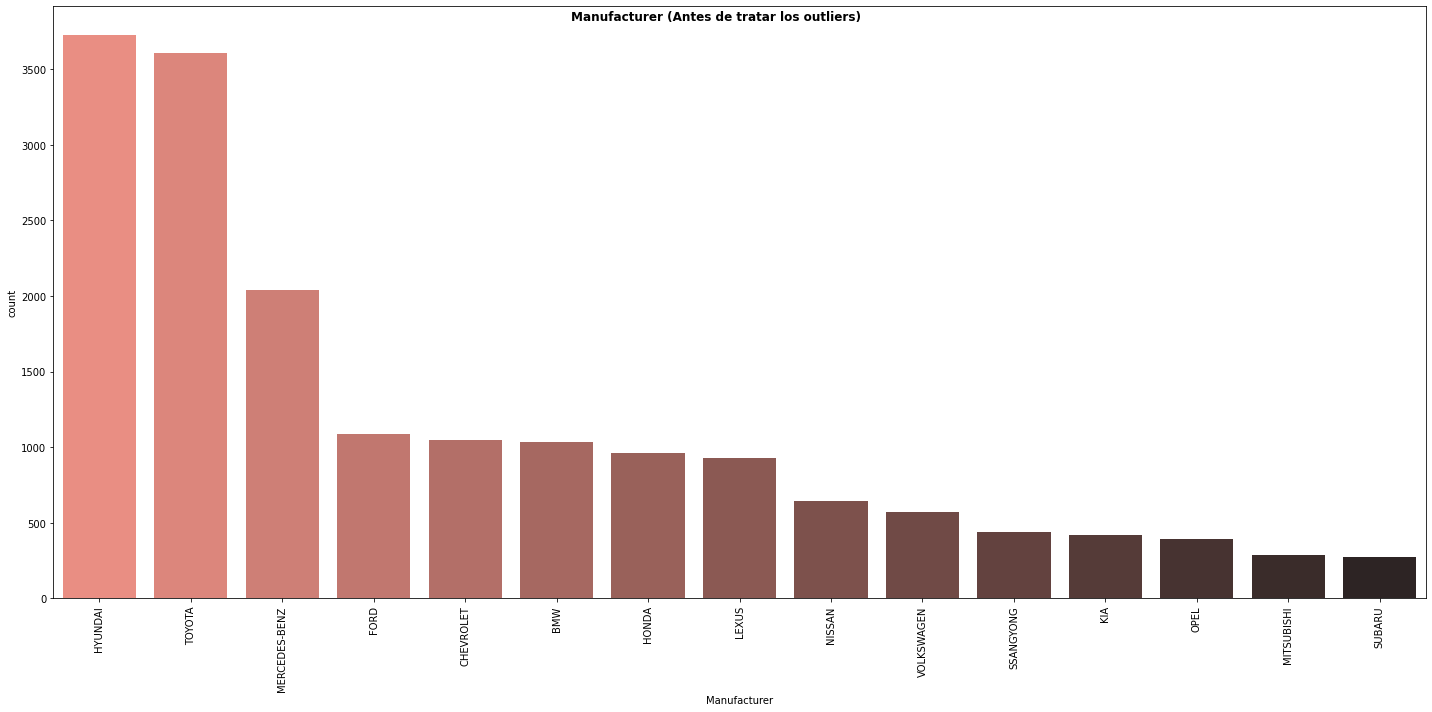

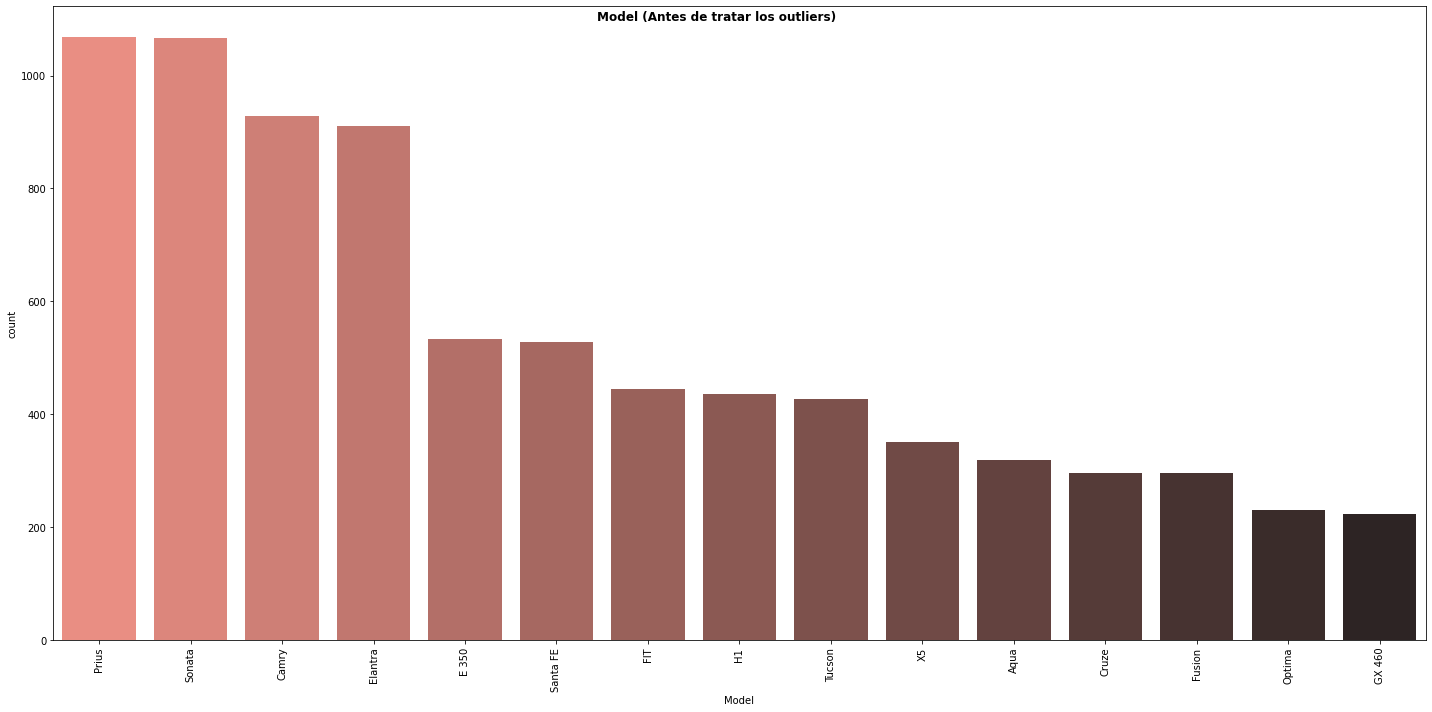

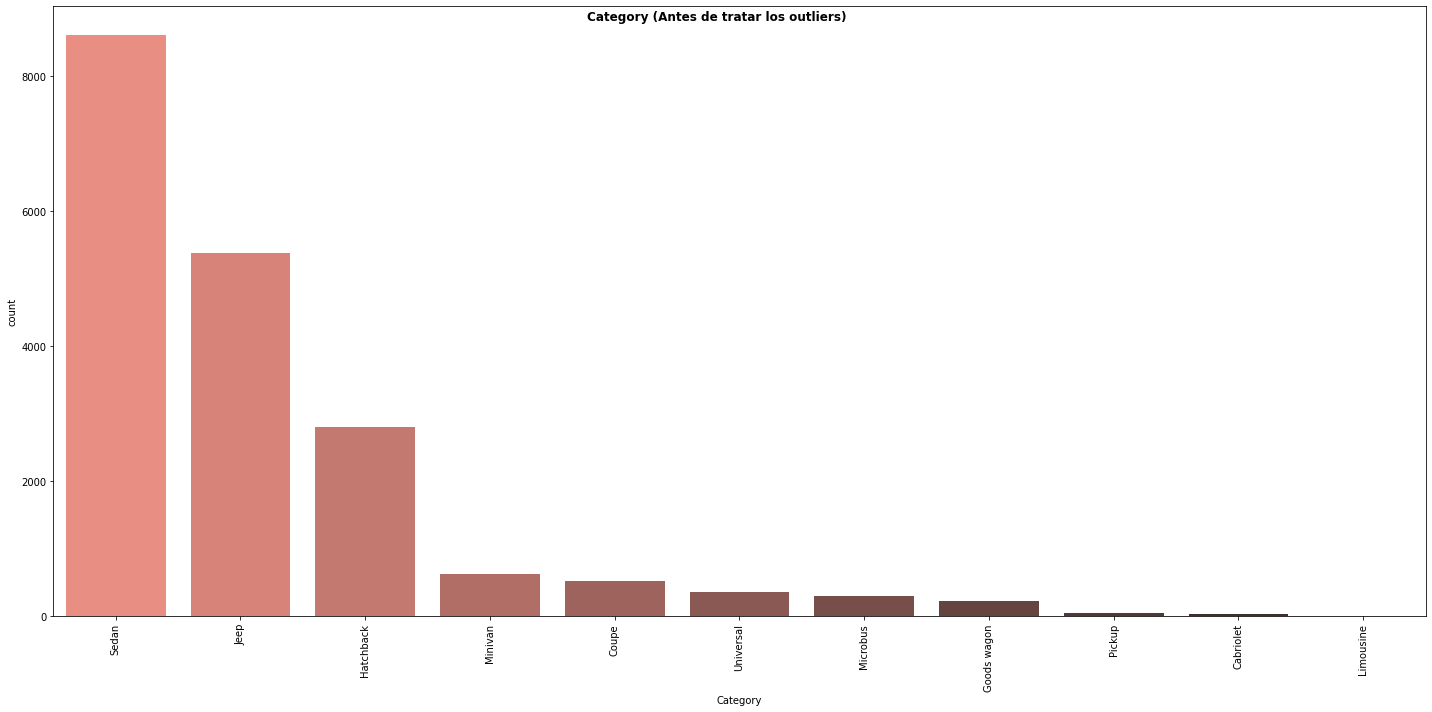

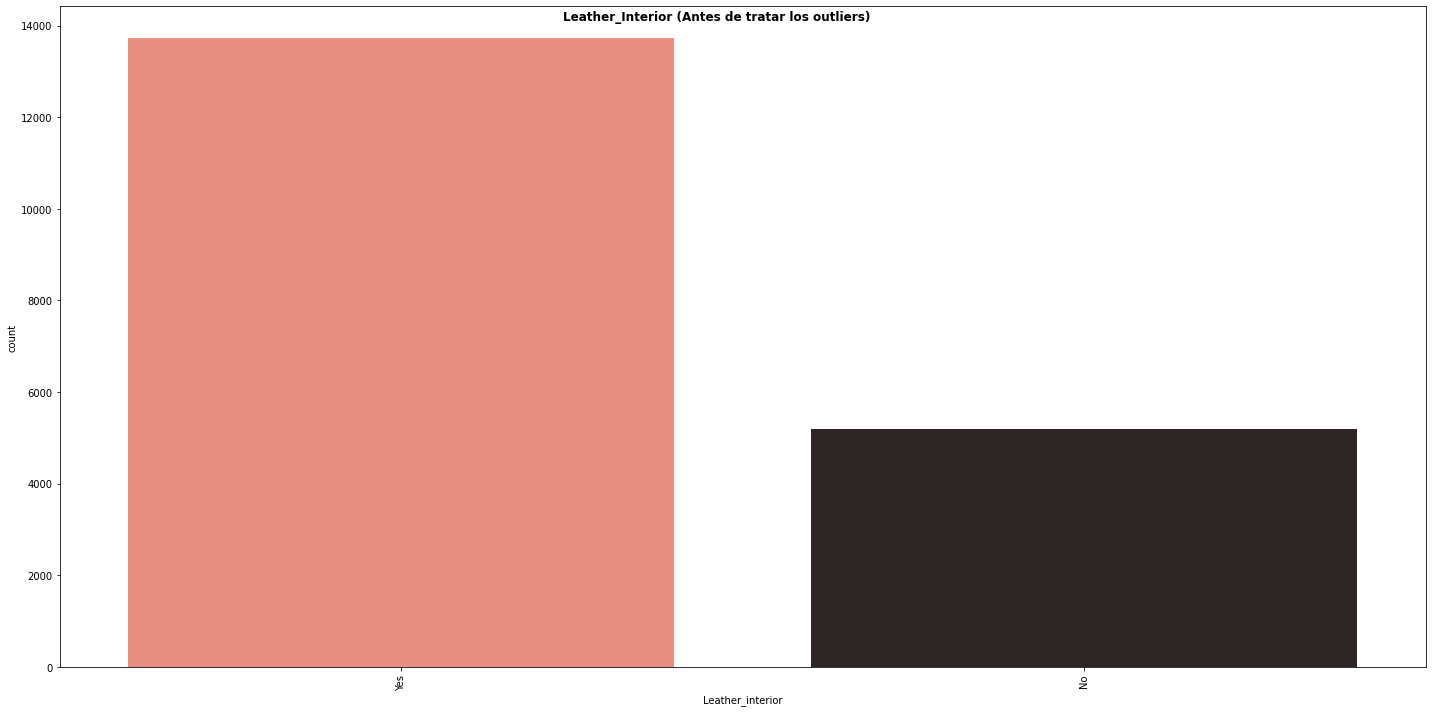

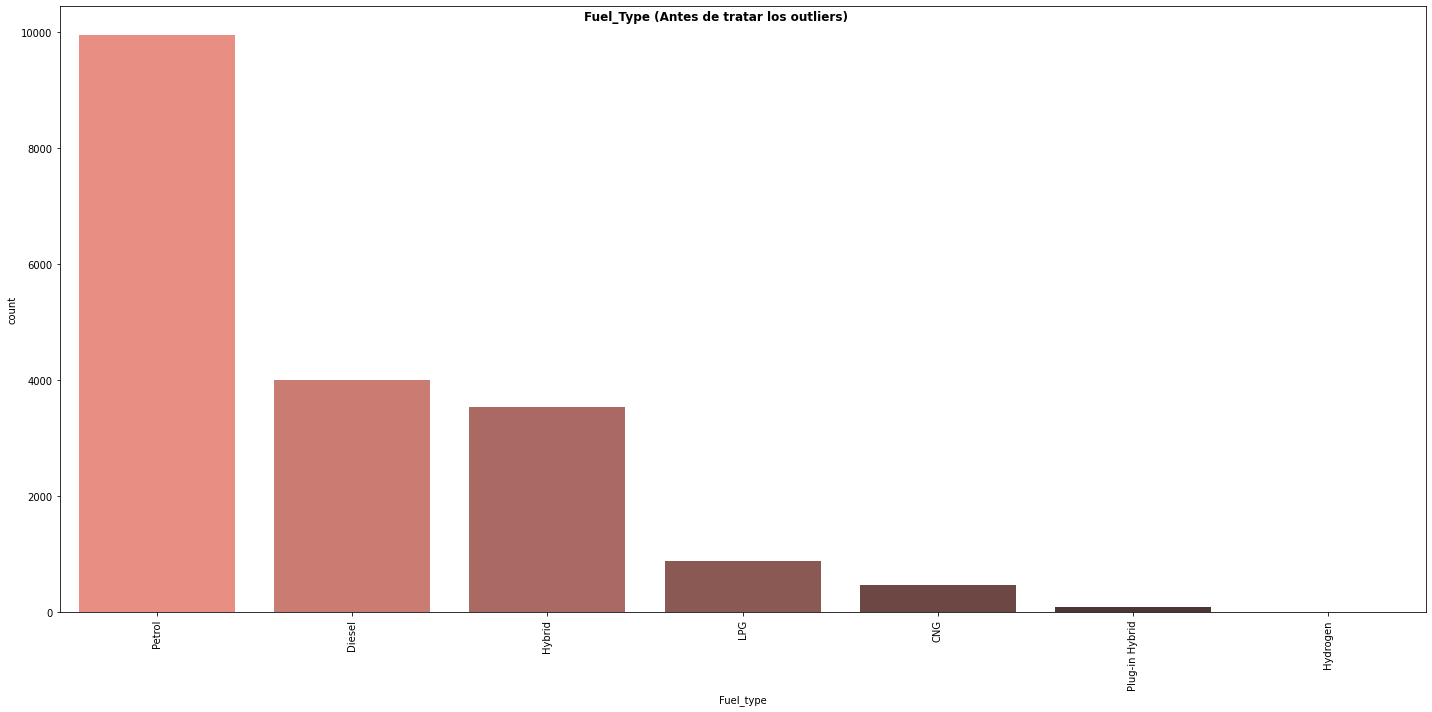

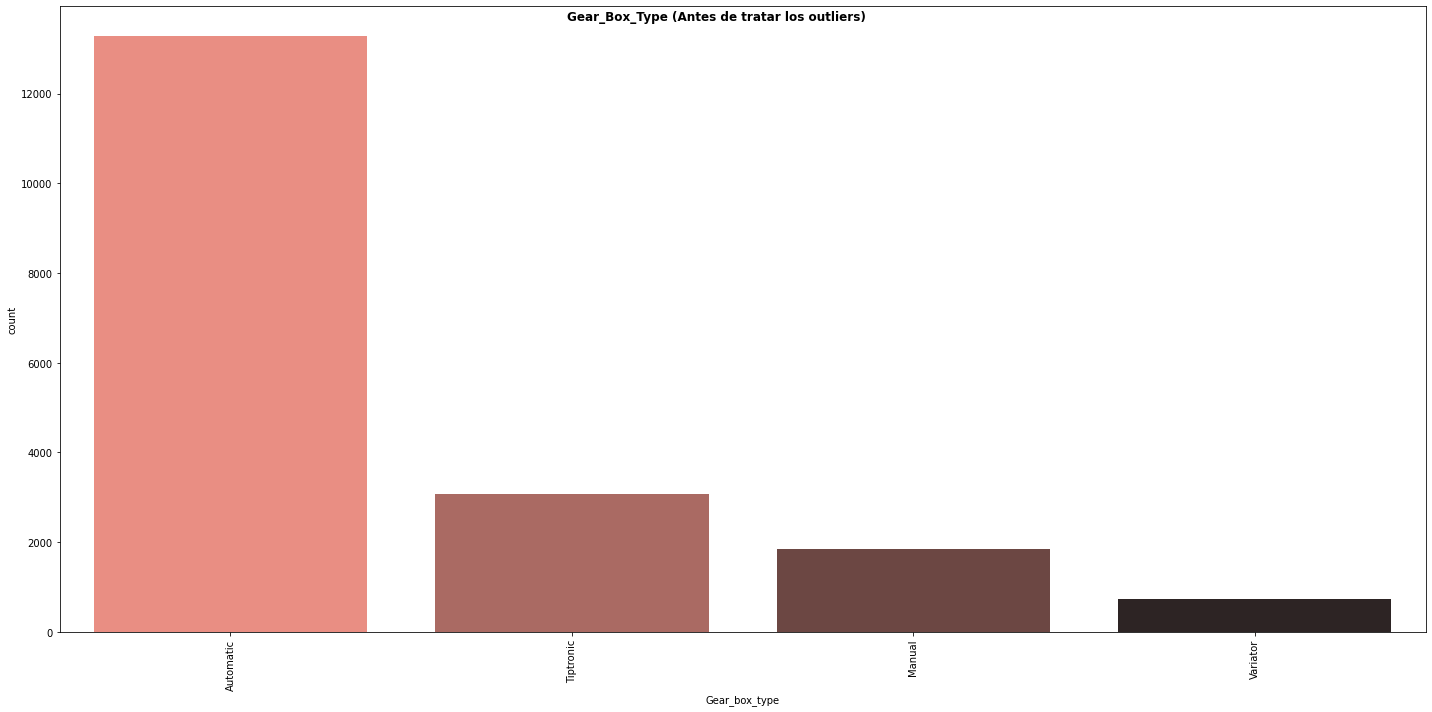

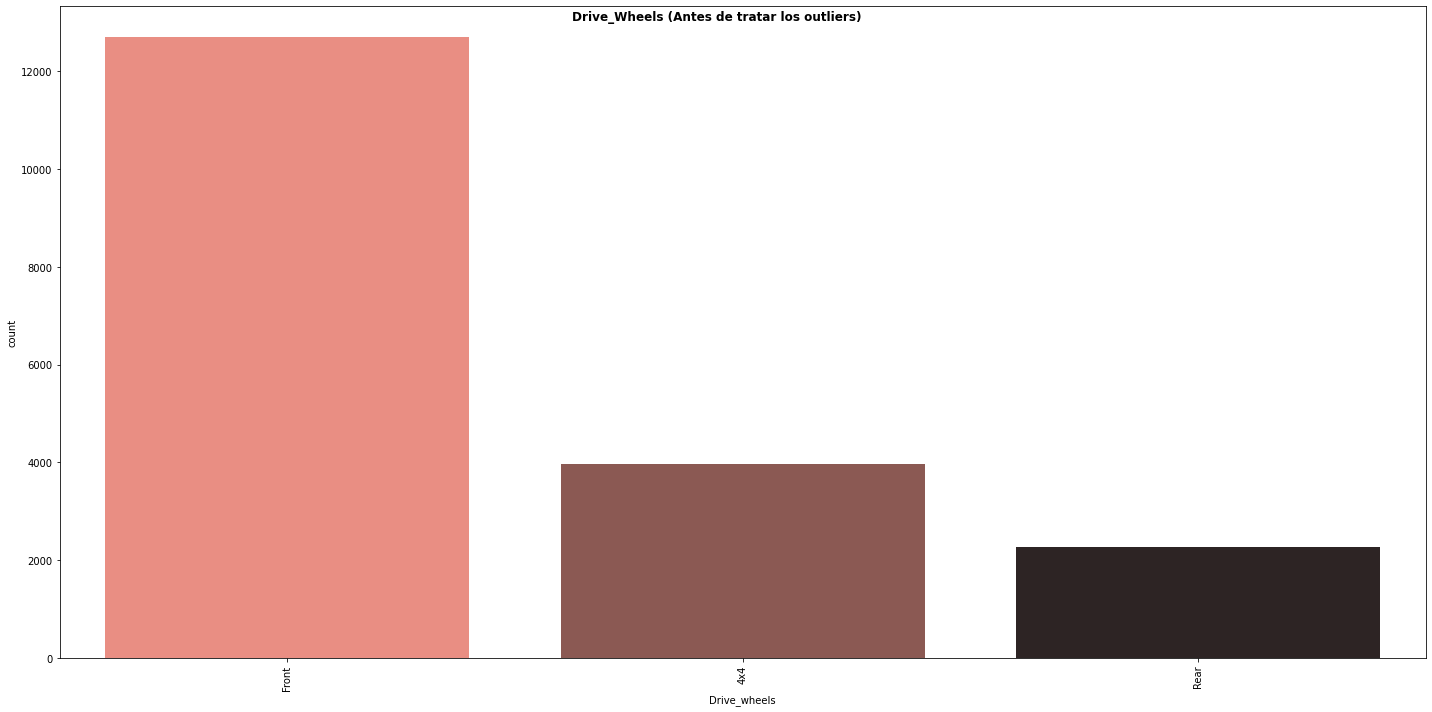

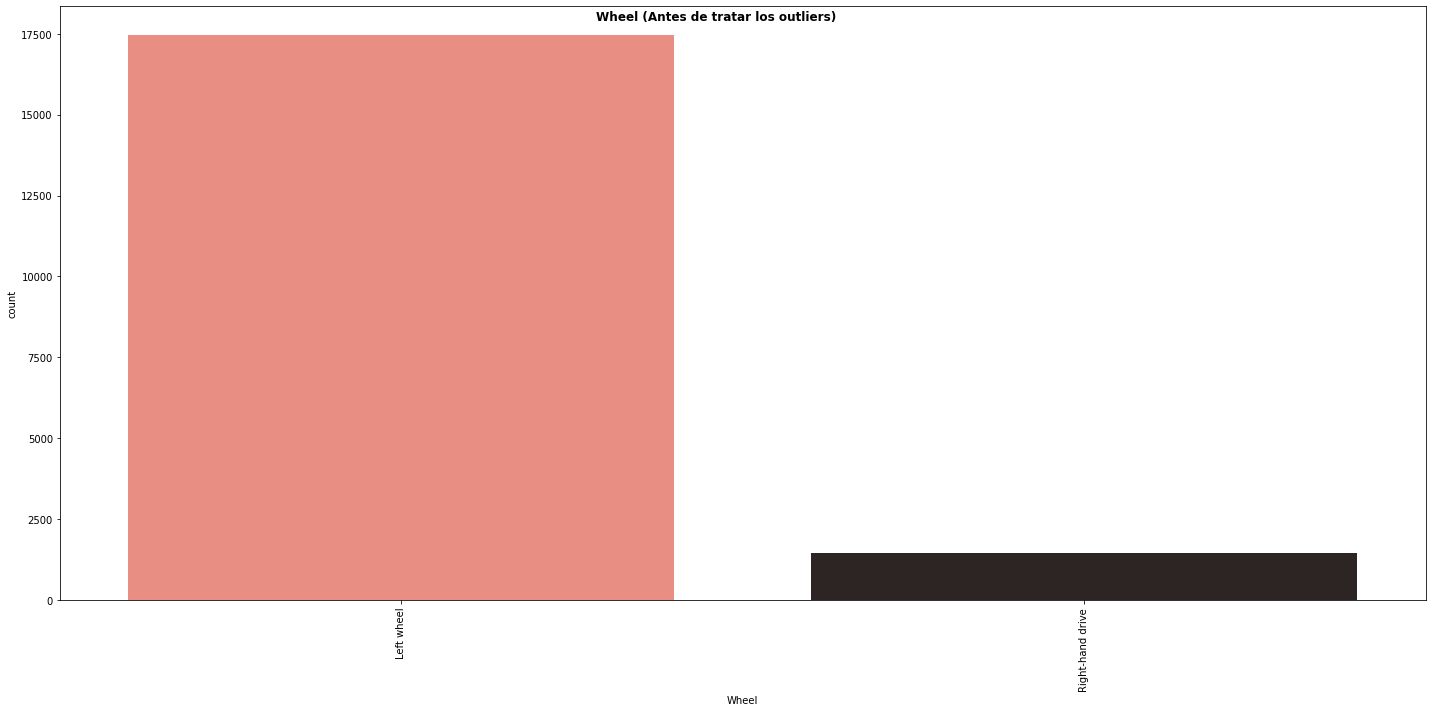

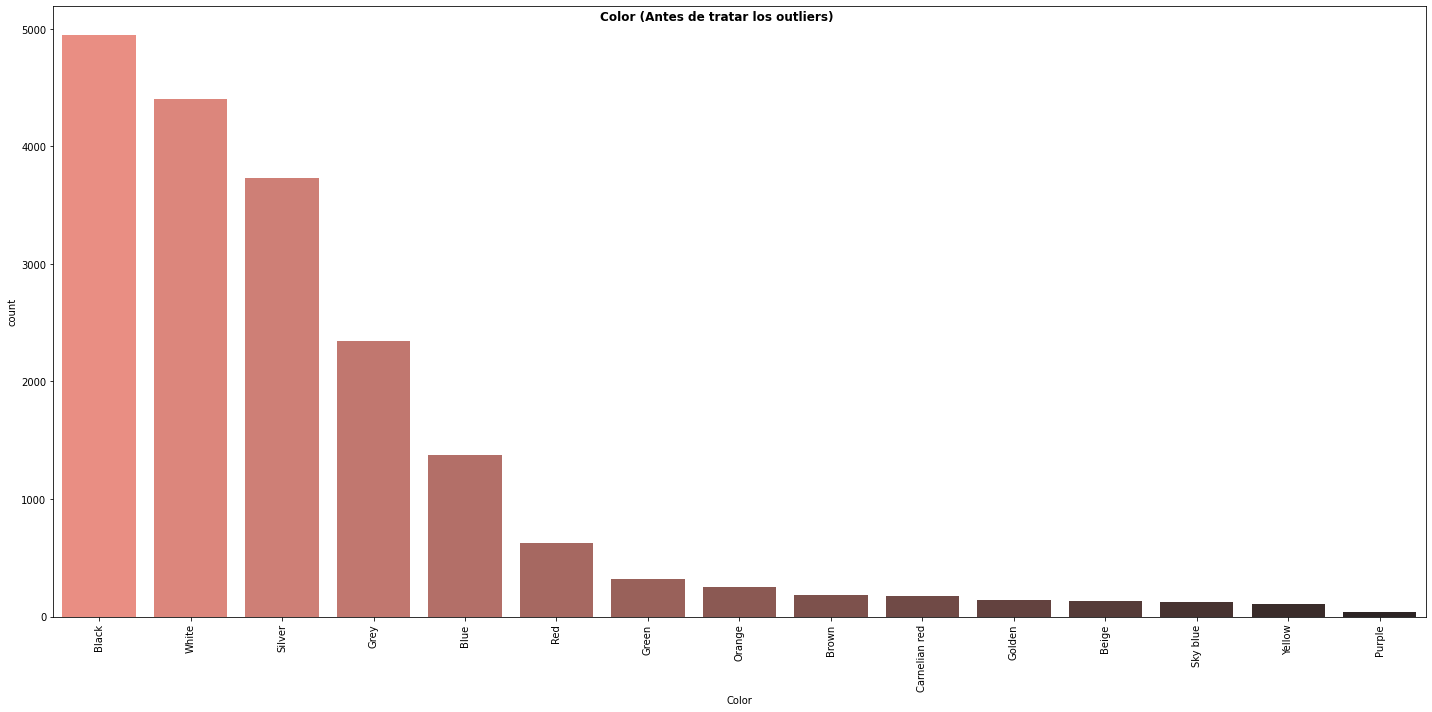

In [ ]:
##Countplots de las variables categóricas.
var_cat = df.select_dtypes(object).columns
for i in var_cat:
        plt.figure(figsize=[20,10])
        sns.countplot(x=df[i],order=df[i].value_counts().iloc[:15].index,palette="dark:salmon_r")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.suptitle(f'{i.title()} (Antes de tratar los outliers)',weight='bold')
        plt.show()

In [ ]:
df.describe()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2010.914236,2.306251,1.555373e+06,4.580216,3.925386,6.568379
std,1.921356e+05,568.273736,5.665749,0.877591,4.880221e+07,1.200223,0.404138,4.322323
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,1.800000,7.019575e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,642.000000,2012.000000,2.000000,1.264000e+05,4.000000,4.000000,6.000000
75%,2.206300e+04,917.000000,2015.000000,2.500000,1.891198e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


Price = 1: Para estos valores, vamos a tomar un valor mínimo de $500 dólares. Aunque pasa a ser un poco irreal, pero para esos valores después podemos aplicarle una media.

Es muchísima información para eliminarla, repercute en casi el 20% de los datos. Así que los apartaremos para luego trabajarlos.


In [ ]:
df_save = df.copy()

In [ ]:
df = df[df['Price']>=500]

In [ ]:
df.describe()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags
count,1.729100e+04,17291.000000,17291.000000,17291.000000,1.729100e+04,17291.000000,17291.000000,17291.000000
mean,2.031866e+04,620.695448,2010.851830,2.286016,1.497552e+06,4.553872,3.920016,6.469319
std,2.009179e+05,564.832773,5.673477,0.858156,4.763244e+07,1.184012,0.416573,4.203791
min,5.000000e+02,0.000000,1943.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,7.683000e+03,0.000000,2009.000000,1.800000,7.002350e+04,4.000000,4.000000,4.000000
50%,1.442600e+04,642.000000,2012.000000,2.000000,1.249120e+05,4.000000,4.000000,4.000000
75%,2.352100e+04,891.000000,2015.000000,2.500000,1.853180e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


Ahora limpiaremos un poco los outliers. Los apartaremos con el rango intercuartil (IQR).

In [ ]:
col_list = ['Price', 'Levy',  'Engine_volume', 'Mileage', 'Airbags']

In [ ]:
def DefinirOutliers(df, col_list):
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        
        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"El total de los outliers en {col_name} son: {outliers} - {round(100*(outliers)/total,2)}%.")

DefinirOutliers(df, col_list)

El total de los outliers en Price son: 1043 - 6.03%.
El total de los outliers en Levy son: 133 - 0.77%.
El total de los outliers en Engine_volume son: 1172 - 6.78%.
El total de los outliers en Mileage son: 626 - 3.62%.
El total de los outliers en Airbags son: 0 - 0.0%.


Tenemos que tener en cuenta que de estos outliers, muchos pueden ser de lo mismo, así que estos porcentajes no deberíamos sumarlos.

In [ ]:
def SepararOutliers(df, col_list):
    df_new = df.copy()
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_new.loc[:,  col_name] = np.where(df[col_name]> fence_high, fence_high,
                                         np.where(df[col_name]< fence_low, fence_low,
                                                  df[col_name]))
    return df_new
df = SepararOutliers(df, col_list)

print("La estructura de la data filtrada es: ", df.shape)

La estructura de la data filtrada es:  (17291, 18)


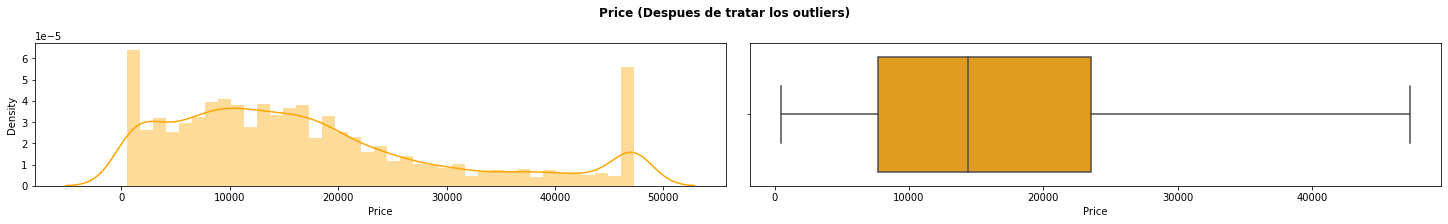

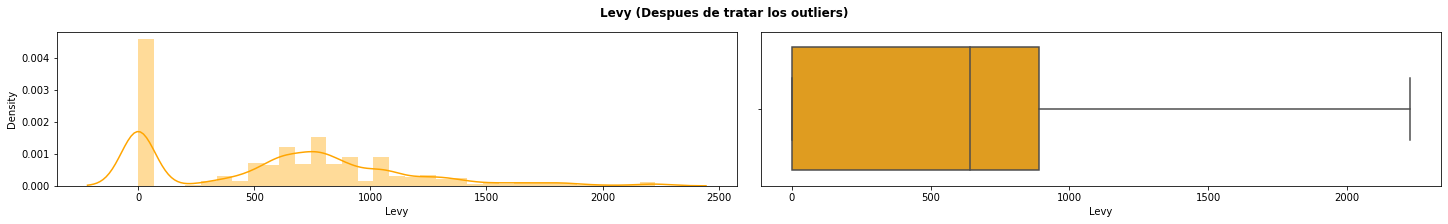

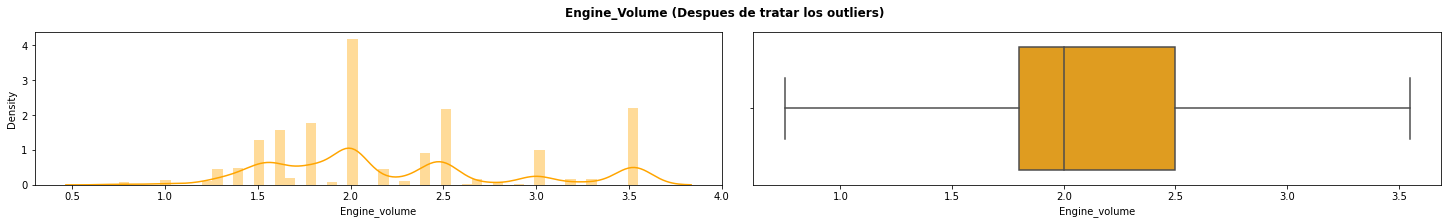

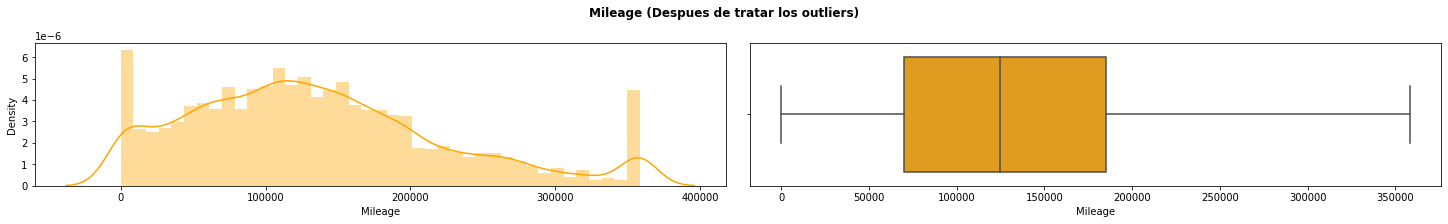

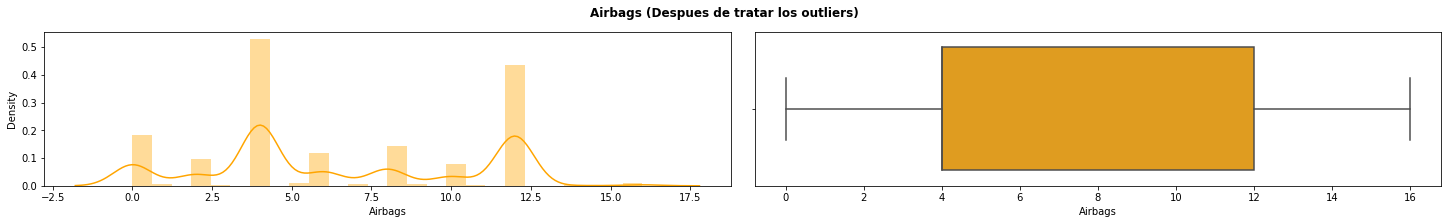

In [ ]:
##Graficamos de nuevo para ver diferencias.
for i in col_list:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(df[i], ax=ax[0],color='orange')
    sns.boxplot(df[i], ax=ax[1],color='orange')
    plt.suptitle(f'{i.title()} (Despues de tratar los outliers)',weight='bold')
    fig.show()



---



---



# Primeros Insights
 
-Hyunday, Toyota y Mercedes-Benz encabezan la lista de las marcas con más liquidez.
 
-Los coches Sedán, como era de esperarse, son los tipos de coches más elegidos por el cliente seguidos por los Jeep y los Hatchback.
 
-Los combustibles a base de petróleo siguen siendo de los más comprados, seguidos por Diesel y los tipo Híbrido. Aunque entre estos dos tipos la diferencia no es tan grande.
 
-Los autos de caja automática lideran con fuerza las ventas.
 
-Tenemos buenos insights del color y de los tipos de tracción de los autos, pero entendiendo un poco el mercado y cómo los vamos a utilizar a futuro, no creo que aporten mucho a nuestro modelo.




---



---



In [ ]:
df.describe()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags
count,17291.000000,17291.000000,17291.000000,17291.000000,17291.000000,17291.000000,17291.000000,17291.000000
mean,17369.804754,612.631109,2010.851830,2.222856,135600.786797,4.553872,3.920016,6.469319
std,13126.280631,512.430018,5.673477,0.670708,88693.829106,1.184012,0.416573,4.203791
min,500.000000,0.000000,1943.000000,0.750000,0.000000,1.000000,2.000000,0.000000
25%,7683.000000,0.000000,2009.000000,1.800000,70023.500000,4.000000,4.000000,4.000000
50%,14426.000000,642.000000,2012.000000,2.000000,124912.000000,4.000000,4.000000,4.000000
75%,23521.000000,891.000000,2015.000000,2.500000,185318.000000,4.000000,4.000000,12.000000
max,47278.000000,2227.500000,2020.000000,3.550000,358259.750000,16.000000,5.000000,16.000000


Levy = 0: Puede que ciertos autos se hayan vendido en el mismo lugar de fabricación, por lo cual, no tendría impuestos de importación/exportación.
 
Mileage = 0: Esto sería correcto mantenerlo porque también hay ventas de coches nuevos.
 
Más adelante usaremos el apartado de outliers para trabajarlos particularmente.
 
Ahora haremos un heatmap para buscar relaciones entre variables, específicamente con las variables Levy y Price que nos faltan limpiar un poco más. Lo que trato de buscar es algún valor medio de estas columnas cuando 'Manufacturer', 'Model', 'Prod_year' y 'Category' son las mismas.


In [ ]:
##Armamos un df con los valores de Levy que son distintos de 0 y buscamos relacion con las variables nombradas anteriormente.
df_try = df[df['Levy']>0]

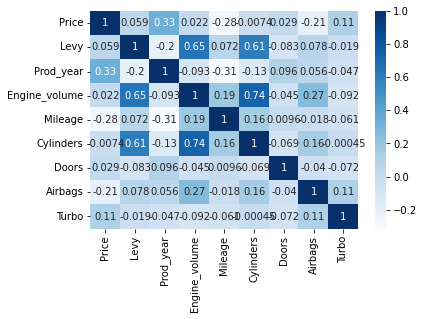

In [ ]:
sns.heatmap(data=df_try.corr(),cmap='Blues',annot=True)
plt.show()

Notamos una relación entre Engine_volume y Cylinders con Levy. Veamos los scatterplot de estas variables.

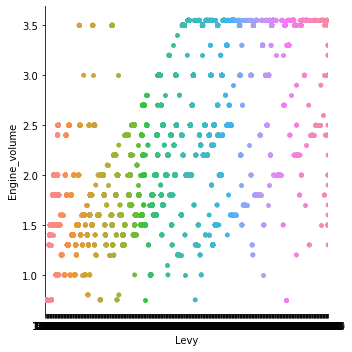

In [ ]:
sns.catplot(data=df_try, x='Levy', y='Engine_volume')

In [ ]:
df_try[df_try.Engine_volume == 2.0]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
5,39493.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.00,4.0,Automatic,Front,4,Left wheel,White,4.0,False
14,47278.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,76000.00,4.0,Automatic,Front,4,Left wheel,White,4.0,False
15,549.0,1079.0,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2.0,74146.00,4.0,Automatic,Front,4,Left wheel,White,12.0,False
30,15681.0,1288.0,MERCEDES-BENZ,Vito,2007,Goods wagon,No,Diesel,2.0,180000.00,6.0,Manual,Rear,4,Left wheel,White,4.0,True
35,23235.0,707.0,HYUNDAI,Santa FE,2011,Jeep,Yes,Diesel,2.0,162000.00,4.0,Automatic,Front,4,Left wheel,Grey,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,7997.0,1079.0,HYUNDAI,Elantra,2018,Sedan,Yes,Petrol,2.0,21090.00,4.0,Automatic,Front,4,Left wheel,Red,12.0,False
19211,47278.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,121902.00,4.0,Automatic,Front,4,Left wheel,Black,4.0,False
19222,10036.0,639.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2.0,358259.75,4.0,Automatic,Front,4,Left wheel,Silver,4.0,False
19234,26108.0,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.00,4.0,Automatic,Front,4,Left wheel,Grey,4.0,False


Como podemos ver, depende del volumen del motor y los cilindros del auto, el Levy puede cambiar entre 800 y 1200 dólares. Pero sigamos buscando más información sobre esto.
 


In [ ]:
df.loc[df['Model'] == 'Sonata'].sort_values(by=['Price'],ascending=True).head(10)

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
7,549.0,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118.0,4.0,Automatic,Front,4,Left wheel,Grey,12.0,False
6904,549.0,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,149123.0,4.0,Automatic,Front,4,Left wheel,Blue,12.0,False
16606,549.0,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,166774.0,4.0,Automatic,Front,4,Left wheel,Silver,12.0,False
8881,549.0,1202.0,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2.4,54990.0,4.0,Automatic,Front,4,Left wheel,Black,12.0,False
9763,549.0,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,243051.0,4.0,Automatic,Front,4,Left wheel,White,0.0,False
291,549.0,481.0,HYUNDAI,Sonata,2017,Sedan,Yes,Hybrid,2.0,107387.0,4.0,Automatic,Front,4,Left wheel,Silver,12.0,False
10213,549.0,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118.0,4.0,Automatic,Front,4,Left wheel,Grey,12.0,False
1937,549.0,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,246450.0,4.0,Automatic,Front,4,Left wheel,Silver,12.0,False
18,549.0,2227.5,HYUNDAI,Sonata,2006,Sedan,Yes,Petrol,3.3,295059.0,6.0,Automatic,Rear,4,Left wheel,Blue,12.0,False
196,706.0,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,175827.0,4.0,Automatic,Front,4,Left wheel,Black,12.0,False


In [ ]:
df.loc[df['Model'] == 'Sonata'].sort_values(by=['Price'],ascending=False).head(15)

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
8545,47278.0,1017.0,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2.0,68009.0,4.0,Automatic,Front,4,Left wheel,Black,4.0,False
16596,47278.0,1017.0,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2.0,13941.0,4.0,Automatic,Front,4,Left wheel,White,4.0,False
7851,47278.0,891.0,HYUNDAI,Sonata,2016,Sedan,Yes,Petrol,2.0,43000.0,4.0,Automatic,Front,4,Left wheel,Black,4.0,False
8035,47278.0,1079.0,HYUNDAI,Sonata,2018,Sedan,Yes,Petrol,2.0,21122.0,4.0,Automatic,Front,4,Left wheel,White,4.0,False
8074,47278.0,1079.0,HYUNDAI,Sonata,2018,Sedan,Yes,Petrol,2.0,36304.0,4.0,Automatic,Front,4,Left wheel,Grey,4.0,False
8273,47278.0,891.0,HYUNDAI,Sonata,2016,Sedan,Yes,Petrol,2.0,49829.0,4.0,Automatic,Front,4,Left wheel,White,4.0,False
15223,47278.0,1017.0,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2.0,15470.0,4.0,Automatic,Front,4,Left wheel,Grey,4.0,False
849,47278.0,1017.0,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2.0,64652.0,4.0,Automatic,Front,4,Left wheel,Black,4.0,False
3906,47278.0,1017.0,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2.0,43178.0,4.0,Automatic,Front,4,Left wheel,White,4.0,False
857,47278.0,891.0,HYUNDAI,Sonata,2016,Sedan,Yes,Petrol,2.0,48042.0,4.0,Automatic,Front,4,Left wheel,White,4.0,False


In [ ]:
df.loc[df['Prod_year'] == 2018].sort_values(by=['Engine_volume'],ascending=True).head(15)

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
2010,47278.0,87.0,TESLA,Model X,2018,Sedan,Yes,Petrol,0.75,81907.0,6.0,Automatic,4x4,4,Left wheel,Silver,12.0,False
171,1300.0,0.0,AUDI,50,2018,Coupe,Yes,Petrol,0.75,4000.0,1.0,Tiptronic,Rear,5,Right-hand drive,Blue,0.0,False
4372,15000.0,1539.0,TOYOTA,Sienta,2018,Minivan,No,Petrol,1.00,0.0,3.0,Automatic,Front,4,Right-hand drive,White,4.0,False
12690,15524.0,583.0,FORD,Focus se,2018,Sedan,No,Petrol,1.00,12459.0,3.0,Automatic,Front,4,Left wheel,Black,8.0,True
12841,18033.0,583.0,FORD,EcoSport,2018,Jeep,No,Petrol,1.00,8813.0,3.0,Automatic,4x4,4,Left wheel,Red,8.0,True
11469,13322.0,583.0,CHEVROLET,Spark,2018,Hatchback,Yes,Petrol,1.00,62499.0,4.0,Automatic,Front,4,Left wheel,White,4.0,False
10029,47278.0,0.0,TOYOTA,CHR,2018,Jeep,Yes,Petrol,1.20,12000.0,4.0,Tiptronic,4x4,4,Left wheel,White,12.0,False
10687,1411.0,682.0,MITSUBISHI,Mirage,2018,Sedan,Yes,Petrol,1.20,7430.0,3.0,Automatic,Front,4,Left wheel,Grey,12.0,False
6829,21683.0,732.0,HONDA,FIT,2018,Hatchback,Yes,Petrol,1.30,10970.0,4.0,Automatic,Front,4,Left wheel,Silver,4.0,False
6047,22291.0,732.0,HONDA,FIT,2018,Hatchback,Yes,Petrol,1.30,5987.0,4.0,Automatic,Front,4,Left wheel,Silver,4.0,False


Acá podemos ver como los valores de Levy y Price de los vehiculos HYUNDAI Sonata y otros tienen cambios mucho más claros. De acuerdo a el Año del vehiculo y el Engine_volume el precio va modificandose gradualmente. Solo en casos extremos de Engine Volume el valor de Levy cambia drásticamente.

*   Engine_volume = 3.3 / Levy = 2227.5
*   Engine_volume = 2.0 / Levy = 891

Pero en una situación más clara, podemos ver que:

*   Prod_year = 2018 / Levy = 1079
*   Prod_year = 2017 / Levy = 1017
*   Prod_year = 2016 / Levy = 891
*   Prod_year < 2015 sigue bajando progresivamente el Levy


In [ ]:
##Como último paso, como ya tenemos insights de las elecciones de colores vamos a eliminar la columna ya que no nos sirve de utilidad en el futuro.
df.drop(columns='Color',inplace=True)
df.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Airbags,Turbo
0,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,12.0,False
1,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,8.0,False
2,8467.0,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,2.0,False
3,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,0.0,False
4,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,4.0,False


Antes de finalizar con la limpieza de los Airbags como 0.0 vamos a continuar con:

---

# Encoding

---



In [ ]:
cat_col = df.iloc[:,[2,3,5,7,11,12]]
num_col = df.iloc[:,[0,1,4,8,9,10,13,15]]
bool_col = df.iloc[:,[6,14,16]]

### OrdinalEncoder
Usamos esta libreria para enumerar los valores de los registros categóricos

In [ ]:
ordinal_enc = OrdinalEncoder()
type(ordinal_enc)

sklearn.preprocessing._encoders.OrdinalEncoder

In [ ]:
df_cat_enc = ordinal_enc.fit_transform(cat_col)
ordinal_enc.categories_

[array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
        'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO',
        'DAIHATSU', 'DODGE', 'FERRARI', 'FIAT', 'FORD', 'GAZ', 'GMC',
        'GREATWALL', 'HAVAL', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI',
        'ISUZU', 'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI', 'LANCIA',
        'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI', 'MAZDA',
        'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI', 'MOSKVICH',
        'NISSAN', 'OPEL', 'PEUGEOT', 'PONTIAC', 'PORSCHE', 'RENAULT',
        'ROVER', 'SAAB', 'SATURN', 'SCION', 'SEAT', 'SKODA', 'SSANGYONG',
        'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA', 'UAZ', 'VAZ', 'VOLKSWAGEN',
        'VOLVO', 'ZAZ', 'სხვა'], dtype=object),
 array(['09-Mar', '100', '100 NX', ..., 'macan S', 'tC', 'xD'],
       dtype=object),
 array(['Cabriolet', 'Coupe', 'Goods wagon', 'Hatchback', 'Jeep',
        'Limousine', 'Microbus', 'Minivan', 'Pickup', 'Sedan', 'Universal'],
       dtype=o

### OneHotEncoder
Las variables booleanas las transformamos con esta libreria.

In [ ]:
Onehot_enc = OneHotEncoder(drop='if_binary')
type(Onehot_enc)

sklearn.preprocessing._encoders.OneHotEncoder

In [ ]:
df_bool_enc = Onehot_enc.fit_transform(bool_col).toarray()
Onehot_enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['Left wheel', 'Right-hand drive'], dtype=object),
 array([False,  True])]

In [ ]:
df_bool_enc

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
##Tiramos un head para ver que nos toma como 1 y que nos toma como 0
df.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Airbags,Turbo
0,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,12.0,False
1,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,8.0,False
2,8467.0,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,2.0,False
3,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,0.0,False
4,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,4.0,False


Leather_int? si = 1/no = 0

Right-hand_drive? si = 1/no = 0

Turbo? si = 1/no = 0

Unificamos los array en un df.

In [ ]:
df_bool = pd.DataFrame(df_bool_enc, columns = ('Leather_int?','Right-hand_drive?','Turbo?'), dtype=float)
df_cat = pd.DataFrame(df_cat_enc, columns = ('Manufacturer','Model','Category','Fuel_type','Gear_box_type','Drive_wheels'), dtype=float)
df_num = pd.DataFrame(num_col, columns = ('Price','Levy','Prod_year','Engine_volume','Mileage','Cylinders','Doors','Airbags'))
df_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17291 entries, 0 to 17290
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Leather_int?       17291 non-null  float64
 1   Right-hand_drive?  17291 non-null  float64
 2   Turbo?             17291 non-null  float64
dtypes: float64(3)
memory usage: 405.4 KB


In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17291 entries, 0 to 17290
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Manufacturer   17291 non-null  float64
 1   Model          17291 non-null  float64
 2   Category       17291 non-null  float64
 3   Fuel_type      17291 non-null  float64
 4   Gear_box_type  17291 non-null  float64
 5   Drive_wheels   17291 non-null  float64
dtypes: float64(6)
memory usage: 810.6 KB


In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17291 entries, 0 to 19235
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          17291 non-null  float64
 1   Levy           17291 non-null  float64
 2   Prod_year      17291 non-null  int64  
 3   Engine_volume  17291 non-null  float64
 4   Mileage        17291 non-null  float64
 5   Cylinders      17291 non-null  float64
 6   Doors          17291 non-null  int64  
 7   Airbags        17291 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [ ]:
df_1 = pd.merge(df_num, df_cat, left_index=True, right_index=True).merge(df_bool, left_index=True, right_index=True)
df_1.head()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags,Manufacturer,Model,Category,Fuel_type,Gear_box_type,Drive_wheels,Leather_int?,Right-hand_drive?,Turbo?
0,13328.0,1399.0,2010,3.5,186005.0,6.0,4,12.0,32.0,1230.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0
1,16621.0,1018.0,2011,3.0,192000.0,6.0,4,8.0,8.0,650.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
2,8467.0,0.0,2006,1.3,200000.0,4.0,4,2.0,21.0,676.0,3.0,5.0,3.0,1.0,0.0,1.0,0.0
3,3607.0,862.0,2011,2.5,168966.0,4.0,4,0.0,16.0,653.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0
4,11726.0,446.0,2014,1.3,91901.0,4.0,4,4.0,21.0,676.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0


Ahora que tenemos todas las variables en forma numérica podemos continuar con la ultima transformación y los modelos.



---



---



In [ ]:
df_1.head()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags,Manufacturer,Model,Category,Fuel_type,Gear_box_type,Drive_wheels,Leather_int?,Right-hand_drive?,Turbo?
0,13328.0,1399.0,2010,3.5,186005.0,6.0,4,12.0,32.0,1230.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0
1,16621.0,1018.0,2011,3.0,192000.0,6.0,4,8.0,8.0,650.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
2,8467.0,0.0,2006,1.3,200000.0,4.0,4,2.0,21.0,676.0,3.0,5.0,3.0,1.0,0.0,1.0,0.0
3,3607.0,862.0,2011,2.5,168966.0,4.0,4,0.0,16.0,653.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0
4,11726.0,446.0,2014,1.3,91901.0,4.0,4,4.0,21.0,676.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_copy = df_1.copy(deep=True)

In [ ]:
df_copy['Airbags'] = df_copy['Airbags'].replace([0], np.nan)
df_copy.isna().sum()

Price                   0
Levy                    0
Prod_year               0
Engine_volume           0
Mileage                 0
Cylinders               0
Doors                   0
Airbags              1744
Manufacturer            0
Model                   0
Category                0
Fuel_type               0
Gear_box_type           0
Drive_wheels            0
Leather_int?            0
Right-hand_drive?       0
Turbo?                  0
dtype: int64

In [ ]:
knnimp = KNNImputer(n_neighbors=13)

##ItImputTR = IterativeImputer(estimator=DecisionTreeRegressor, missing_values = 0.0, max_iter=10, random_state=0) (segunda opción)

In [ ]:
df_copy.iloc[:,:] = knnimp.fit_transform(df_copy).round(0)

In [ ]:
df_copy.head(15)

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags,Manufacturer,Model,Category,Fuel_type,Gear_box_type,Drive_wheels,Leather_int?,Right-hand_drive?,Turbo?
0,13328.0,1399.0,2010.0,4.0,186005.0,6.0,4.0,12.0,32.0,1230.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0
1,16621.0,1018.0,2011.0,3.0,192000.0,6.0,4.0,8.0,8.0,650.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
2,8467.0,0.0,2006.0,1.0,200000.0,4.0,4.0,2.0,21.0,676.0,3.0,5.0,3.0,1.0,0.0,1.0,0.0
3,3607.0,862.0,2011.0,2.0,168966.0,4.0,4.0,9.0,16.0,653.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0
4,11726.0,446.0,2014.0,1.0,91901.0,4.0,4.0,4.0,21.0,676.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0
5,39493.0,891.0,2016.0,2.0,160931.0,4.0,4.0,4.0,23.0,1289.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0
6,1803.0,761.0,2010.0,2.0,258909.0,4.0,4.0,12.0,57.0,1142.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0
7,549.0,751.0,2013.0,2.0,216118.0,4.0,4.0,12.0,23.0,1316.0,9.0,5.0,0.0,1.0,1.0,0.0,0.0
8,1098.0,394.0,2014.0,2.0,358260.0,4.0,4.0,12.0,57.0,431.0,9.0,2.0,0.0,1.0,1.0,0.0,0.0
9,26657.0,0.0,2007.0,4.0,128500.0,6.0,4.0,12.0,32.0,1223.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_copy.isna().sum()

Price                0
Levy                 0
Prod_year            0
Engine_volume        0
Mileage              0
Cylinders            0
Doors                0
Airbags              0
Manufacturer         0
Model                0
Category             0
Fuel_type            0
Gear_box_type        0
Drive_wheels         0
Leather_int?         0
Right-hand_drive?    0
Turbo?               0
dtype: int64

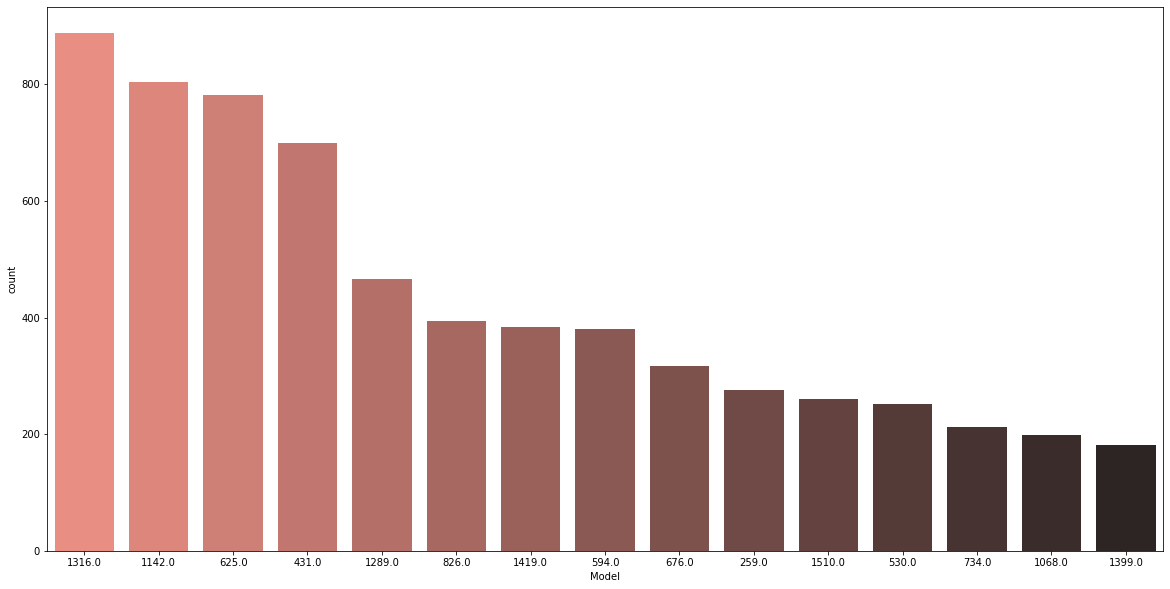

In [ ]:
plt.figure(figsize=[20,10])
sns.countplot(x=df_copy['Model'],order=df_copy['Model'].value_counts().iloc[:15].index,palette="dark:salmon_r")

In [ ]:
df_copy.head()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags,Manufacturer,Model,Category,Fuel_type,Gear_box_type,Drive_wheels,Leather_int?,Right-hand_drive?,Turbo?
0,13328.0,1399.0,2010.0,4.0,186005.0,6.0,4.0,12.0,32.0,1230.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0
1,16621.0,1018.0,2011.0,3.0,192000.0,6.0,4.0,8.0,8.0,650.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
2,8467.0,0.0,2006.0,1.0,200000.0,4.0,4.0,2.0,21.0,676.0,3.0,5.0,3.0,1.0,0.0,1.0,0.0
3,3607.0,862.0,2011.0,2.0,168966.0,4.0,4.0,9.0,16.0,653.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0
4,11726.0,446.0,2014.0,1.0,91901.0,4.0,4.0,4.0,21.0,676.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Airbags,Turbo
0,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,12.0,False
1,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,8.0,False
2,8467.0,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,2.0,False
3,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,0.0,False
4,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,4.0,False


In [ ]:
df_copy['Airbags'].unique()

array([12.,  8.,  2.,  9.,  4.,  6.,  5., 10.,  3.,  1., 16.,  7., 11.,
       14., 15.])

Ya pudimos terminar de completar la limpieza. Los valores de Airbags ya estan correctamente transformados, no tenemos valores nulos. 

Podemos avanzar a la parte del modelado.



---


# Modeling


---



In [ ]:
Y = df_copy['Price'].values
Y

array([13328., 16621.,  8467., ..., 45674.,  1882., 21953.])

In [ ]:
X = df_copy.drop(['Price'], axis=1).values
X

array([[1.399e+03, 2.010e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.018e+03, 2.011e+03, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.006e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.490e+02, 2.014e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.053e+03, 2.014e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.360e+02, 2.010e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

Escalando variables para mejor funcionamiento de modelos

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### Probamos PCA

In [ ]:
#Aplicacion de PCA
#from sklearn.decomposition import PCA

#pca = PCA()
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente

#explained_variance = pca.explained_variance_ratio_
#explained_variance

#array([0.20955438, 0.10437028, 0.09630355, 0.0853205 , 0.08164272,
#       0.06674363, 0.05800318, 0.05654316, 0.05321682, 0.04863664,
#       0.0430693 , 0.0402774 , 0.03447261, 0.01650578, 0.0031827 ,
#       0.00215734])

Al tener poca varianza en cada componente no podemos extraer muchas variables al momento de usar los modelos.

### Modelos de ML

In [ ]:
lr  = LinearRegression()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()
ada = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()

In [ ]:
regressors = [('Linear Regression', lr), ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada), ('Gradient Boosting Regressor', gbr), ('XGBRegressor', xgb)]

Linear Regression Train: 29 %
Linear Regression Test: 32 %
Decision Tree Train: 100 %
Decision Tree Test: 32 %
Random Forest Train: 95 %
Random Forest Test: 65 %
AdaBoost Train: 32 %
AdaBoost Test: 33 %
Gradient Boosting Regressor Train: 58 %
Gradient Boosting Regressor Test: 57 %
[15:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Train: 57 %
XGBRegressor Test: 56 %


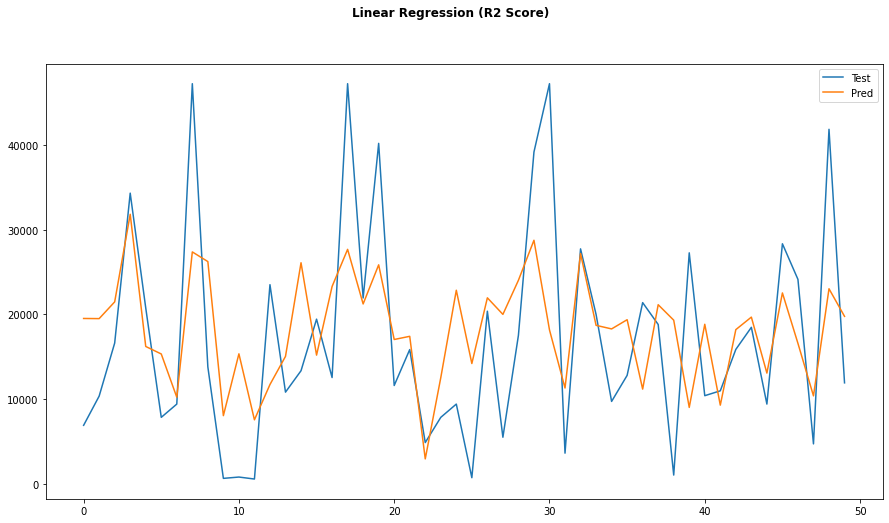

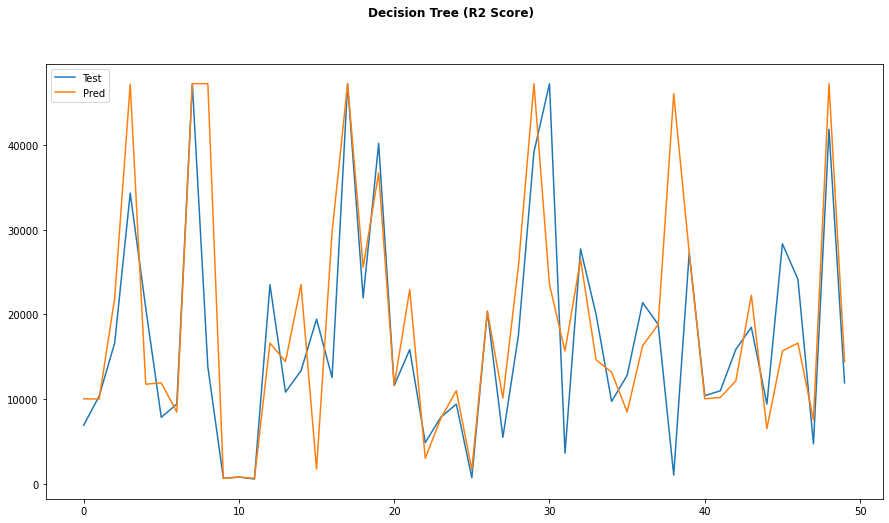

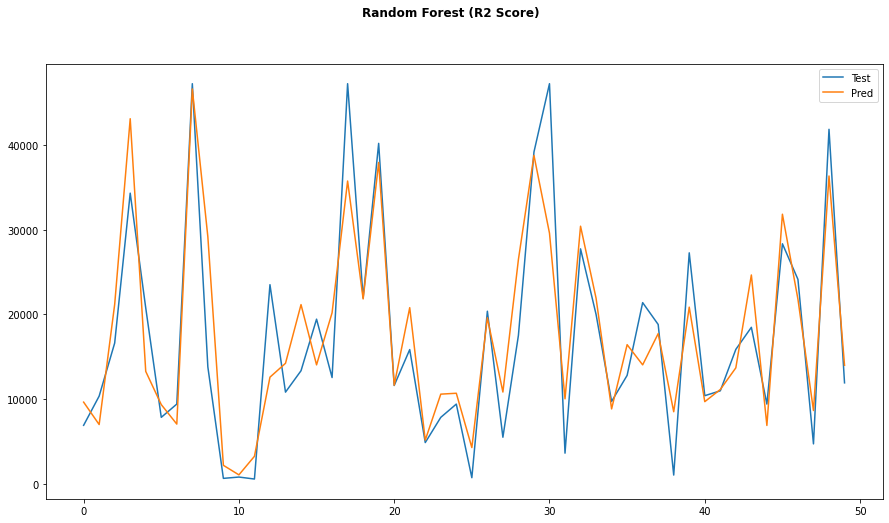

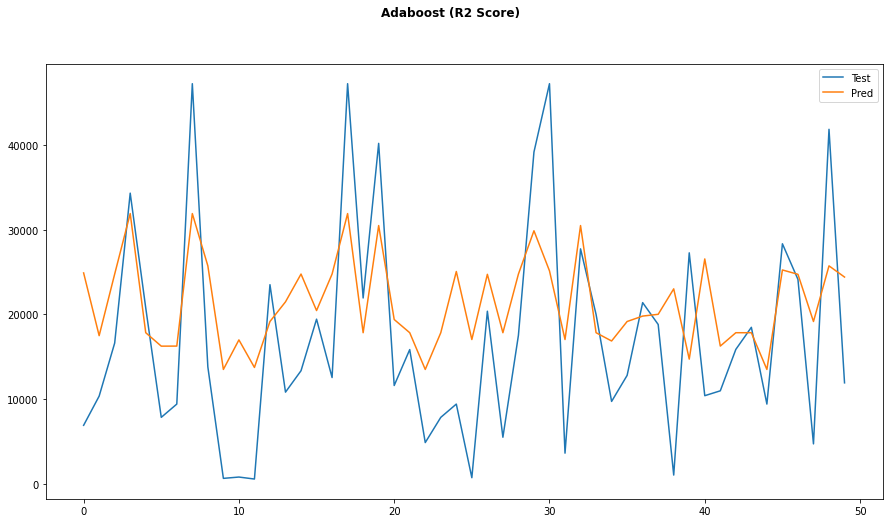

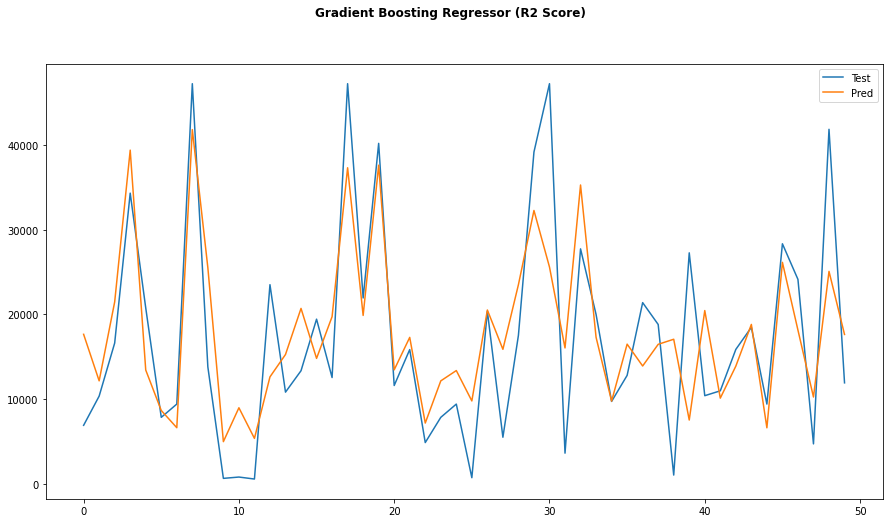

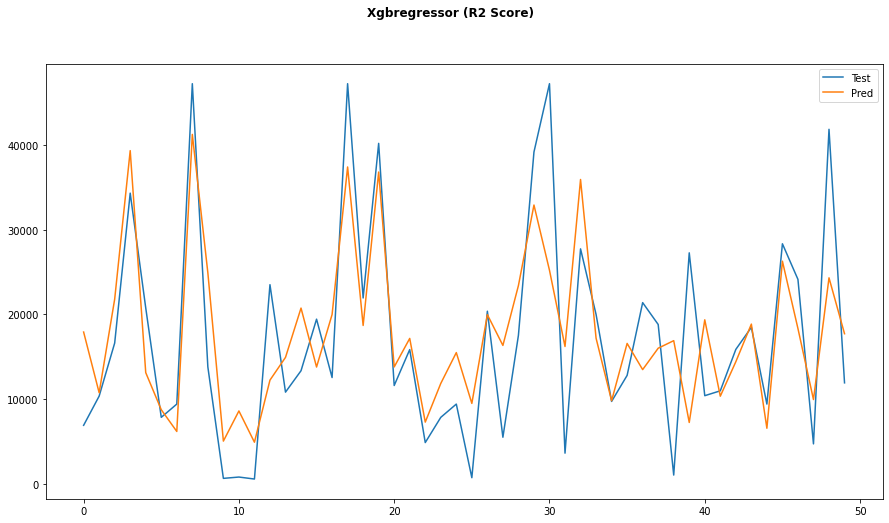

In [ ]:
for RegressorName, regressor in regressors:

    regressor.fit(X_train, Y_train)    
  
    y_train_pred = regressor.predict(X_train) #Prediccion en Train
    y_test_pred = regressor.predict(X_test) #Prediccion en Test
    accuracy_train = round(r2_score(Y_train,y_train_pred),3)*100
    accuracy_test = round(r2_score(Y_test,y_test_pred),3)*100
    
    print('{:s} Train: {:.0f} %'.format(RegressorName, accuracy_train))
    print('{:s} Test: {:.0f} %'.format(RegressorName, accuracy_test))
    RG= pd.DataFrame({'Y_test':Y_test,'y_pred':y_test_pred})
    plt.figure(figsize=(15,8))
    plt.plot(RG[:50])
    plt.suptitle(f'{RegressorName.title()} (R2 Score)',weight='bold')
    plt.legend(['Test' , 'Pred'])



---


## Hypertuning con GridSearchCV


---



---



### Random Forest GridSearchCV

In [ ]:
#%%time
#grid_random_forest.fit(X_train, Y_train)

###Fitting 5 folds for each of 32 candidates, totalling 160 fits
###CPU times: user 8min 10s, sys: 8.98 s, total: 8min 19s
###Wall time: 2h 45min 29s
###GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
###             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
###                                       'poisson'],
###                         'max_depth': [5, 16],
###                         'n_estimators': [150, 200, 250, 300]},
###             scoring='neg_mean_absolute_error', verbose=1)


##Fitting 5 folds for each of 48 candidates, totalling 240 fits
##CPU times: user 2min 21s, sys: 15 s, total: 2min 36s
##Wall time: 4h 40min 20s
#GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
#             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
#                                       'poisson'],
#                         'max_depth': [5, 10, 15],
#                         'n_estimators': [150, 200, 250, 300]},
#             scoring='r2', verbose=1)


In [ ]:
#Obtenemos los mejores estimadores según los parametros escogidos
#Estimador 1= RandomForestRegressor(criterion='absolute_error', max_depth=5, max_features=5)
#Estimador 2= RandomForestRegressor(criterion='absolute_error', max_depth=16,n_estimators=200)
#Estimador 3= RandomForestRegressor(max_depth=15, n_estimators=300)
                      
#grid_random_forest.best_estimator_

In [ ]:
#Primera Prueba

#{'criterion': 'absolute_error',
#'max_depth': 5,
#'max_features': 5,
#'n_estimators': 100}

#Segunda Prueba

#{'criterion': 'absolute_error', 'max_depth': 16, 'n_estimators': 200}

#Tercera Prueba

##{'criterion': 'squared_error', 'max_depth': 15, 'n_estimators': 300}

In [ ]:
#Obtenemos los mejores parámetros dentro de la franja 
#grid_random_forest.best_params_

##{'criterion': 'absolute_error', 'max_depth': 16, 'n_estimators': 200}
##{'criterion': 'squared_error', 'max_depth': 15, 'n_estimators': 300}

lr  = LinearRegression()
dt  = DecisionTreeRegressor(max_depth = 15)
rf  = RandomForestRegressor(n_estimators=300, max_features= 7)
ada = AdaBoostRegressor( n_estimators=300, learning_rate =1)
gbr = GradientBoostingRegressor(max_depth=15, n_estimators=300, learning_rate =1)
xgb = XGBRegressor(max_depth = 15, n_estimators=300, learning_rate =1)

In [ ]:
#Primer R2_Score: 43.7 
#Segundo R2_Score: 62.1
#Tercer R2_Score: 62.9

### Gradient Boosting Regressor

In [ ]:
#%%time
#grid_random_forest.fit(X_train, Y_train)

### XGBRegressor

In [ ]:
#%%time
#grid_random_forest.fit(X_train, Y_train)